In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Read files:
train = pd.read_excel(r"C:\Users\PRATIK PANIGRAHI\Desktop\Data_Train.xlsx")
test = pd.read_excel(r"C:\Users\PRATIK PANIGRAHI\Desktop\Data_Test.xlsx")

# Data Exploration

In [3]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
train.shape,test.shape

((12690, 9), (4231, 8))

In [7]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [9]:
train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [10]:
test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

Here we can there are almost all the values arein object format so we have to convert to the integer format.

In [33]:
#missing value treatment for train data
train["CITY"] =train["CITY"].fillna((train["CITY"].mode()[0])) 
train["VOTES"] =train["VOTES"].fillna((train["VOTES"].mode()[0]))
train["LOCALITY"] =train["LOCALITY"].fillna((train["LOCALITY"].mode()[0]))
train["RATING"] =train["RATING"].fillna((train["RATING"].mode()[0]))

In [34]:
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [35]:
#missing value treatment for train data
test["CITY"] =test["CITY"].fillna((test["CITY"].mode()[0])) 
test["VOTES"] =test["VOTES"].fillna((test["VOTES"].mode()[0]))
test["LOCALITY"] =test["LOCALITY"].fillna((test["LOCALITY"].mode()[0]))
test["RATING"] =test["RATING"].fillna((test["RATING"].mode()[0]))
test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

# Label Encoding

In [36]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [37]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
list1=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))

In [17]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,11416,2627,739,320,285,17,1278,1200
1,33,2729,289,1885,67,1046,23,950,1500
2,31,800,2976,661,67,1101,19,712,800
3,95,8827,4130,275,222,136,22,787,800
4,50,4591,1766,615,222,620,19,470,300


In [20]:
train.dtypes

TITLE            int32
RESTAURANT_ID    int32
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
COST             int64
dtype: object

In [26]:
list2=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES']
for val in list1:
    test[val]=le.fit_transform(test[val].astype(str))

In [27]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,23,2368,1293,503,110,662,23,823,
1,75,776,1632,933,96,221,22,871,
2,23,1182,1455,219,96,411,18,575,
3,66,1735,208,1071,41,456,18,179,
4,75,987,1637,208,78,300,16,394,


In [28]:
test.dtypes

TITLE             int32
RESTAURANT_ID     int32
CUISINES          int32
TIME              int32
CITY              int32
LOCALITY          int32
RATING            int32
VOTES             int32
COST             object
dtype: object

In [29]:
test['COST']=le.fit_transform(test['COST'].astype(str))

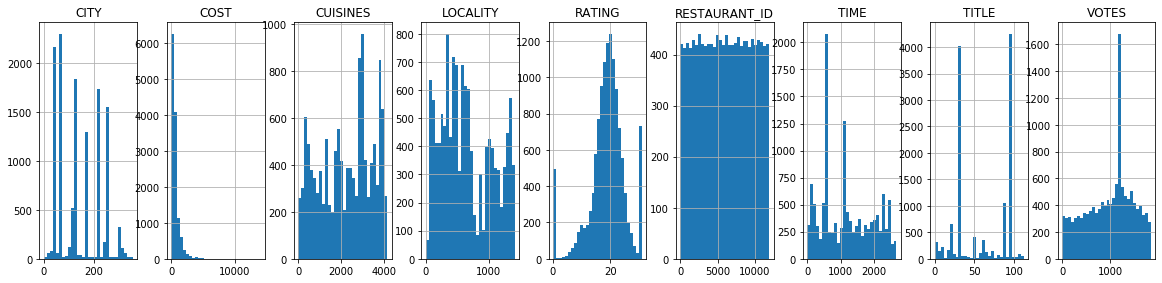

In [44]:
train.hist(figsize=(20,10),grid=True,layout=(2,9),bins=30)
plt.show()

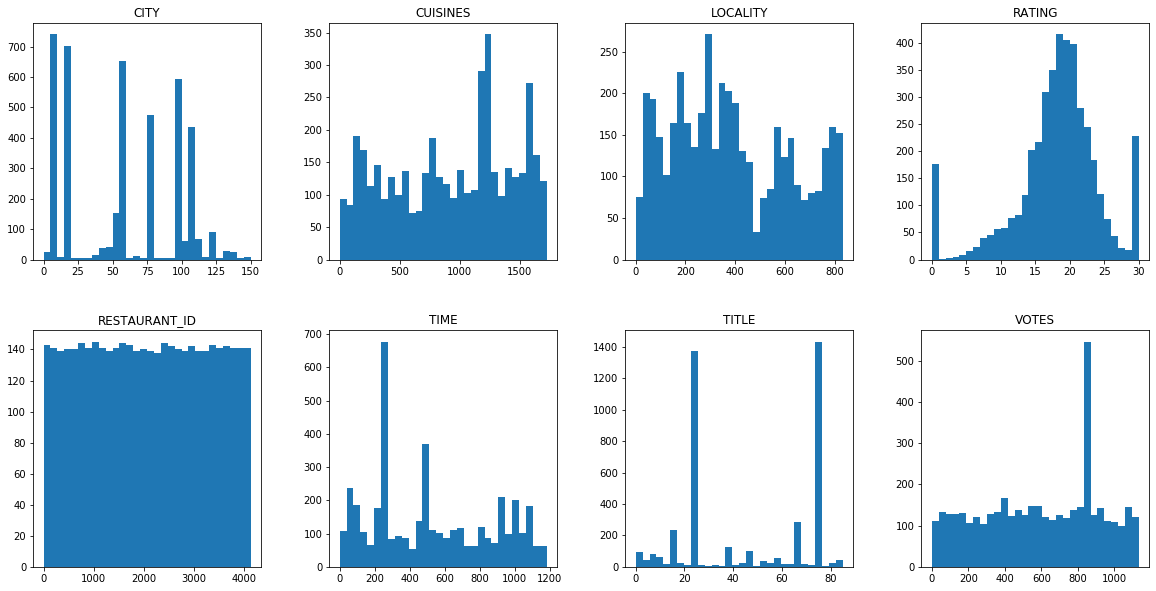

In [45]:
test.hist(figsize=(20,10),grid=False,layout=(2,4),bins=30)
plt.show()

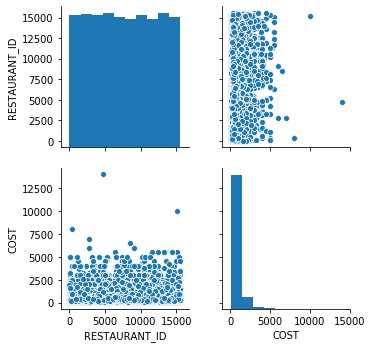

In [8]:
sns.pairplot(train)

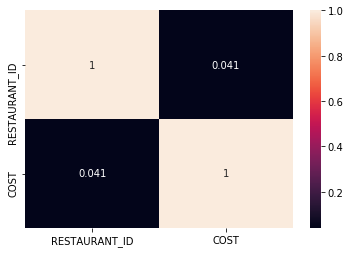

In [9]:
sns.heatmap(train.corr(),annot = True)
plt.show()

In [10]:
#creating a target col in test data
test["COST"] = ""

In [21]:
train.dtypes

TITLE            int32
RESTAURANT_ID    int32
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
COST             int64
dtype: object

In [11]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [30]:
x_train=train.drop('COST',axis=1)
y_train=train['COST']
x_test=test.drop('COST',axis=1)
y_test=test['COST']

In [32]:
x_test.dtypes

TITLE            int32
RESTAURANT_ID    int32
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
# modeling utilities
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [35]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
dtr.score(x_train, y_train)

0.5819879571842197

# Grid Search CV

In [37]:
param_grid = {"criterion": ["mse", "mae"]
                 }

In [38]:
dtr= DecisionTreeRegressor()

In [39]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [40]:
grid_cv_dtr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'criterion': ['mse', 'mae']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.4387183420478137
Best Hyperparameters::
{'criterion': 'mse'}


In [42]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

In [43]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.4855389056216467
MSE::-213703.24200157606


In [44]:
grid_cv_dtr.score(x_train,y_train)

1.0

In [45]:
#model saving
from sklearn.externals import joblib

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
joblib.dump(grid_cv_dtr, "Project34_Resturant Food Cost.pkl")

['Project34_Resturant Food Cost.pkl']

In [47]:
x= joblib.load("Project32_flight ticket.pkl")